# Read any spatial omics and transfer from other tools

Here is the list of input you need to prepare:

- count matrix
- spatial location
- image path (optional)


First, the count matrix should be an Pandas Dataframe with columns as gene names and rows as barcodes

In [1]:
count_matrix

gene,0610009B22Rik,1110004F10Rik,1110008P14Rik,1110032A03Rik,1110051M20Rik,1110059G10Rik,1110065P20Rik,1500009C09Rik,1500011B03Rik,1500015O10Rik,...,mt-Tc,mt-Tf,mt-Ti,mt-Tl1,mt-Tl2,mt-Tm,mt-Tp,mt-Tq,mt-Ts2,mt-Tv
index,,,,,,,,,,,,,,,,,,,,,
c1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
c2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
c3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
c4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
c5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c12278,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
c12279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
c12280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


The spatial information of the data should also be a Pandas Dataframe with two columns `imagecol` (X) and `imagerow` (Y).

In [2]:
spatial

,imagecol,imagerow
0,2242.482759,1349.896552
1,1707.537313,3820.507463
2,1166.068421,4450.200000
3,4281.867925,4462.679245
4,1462.616000,2813.248000
...,...,...
12277,2395.422018,5990.504587
12278,2623.265060,4220.325301
12279,1808.611111,4375.761111
12280,2336.065693,5332.613139


The image path is optional. If you don't provide any image, the background will be `'black'` or `'white'`.

### Create the object for stLearn

In [3]:
import stlearn as st
adata = st.create_stlearn(count=count_matrix,spatial=spatial,library_id="Sample_test", scale=1,background_color="white")

In [4]:
adata

AnnData object with n_obs × n_vars = 12282 × 3235
    obs: 'imagecol', 'imagerow'
    uns: 'spatial'
    obsm: 'spatial'

### Quality control plot

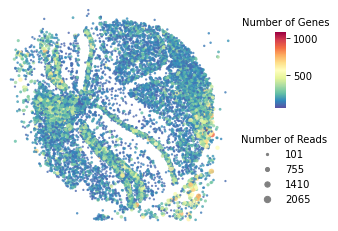

In [5]:
st.pl.QC_plot(adata)

### An example of gene plot

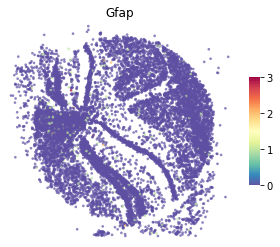

In [6]:
st.pl.gene_plot(adata,gene_symbols="Gfap")

### Add metadata

stLearn core object is using AnnData then you can transfer the clustering results to `adata.obs`. For example, you have clustering results from Seurat `seurat_results` (should be a numpy array), and then you can plot it with `stlearn.pl.cluster_plot` and `use_label == "seurat"` :

In [7]:
adata.obs["seurat"] = pd.Categorical(seurat_results)